In [9]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import logging
import time
from sklearn import metrics
from sklearn.linear_model import LinearRegression


logger = logging.getLogger('spam_application')
logger.setLevel(logging.DEBUG)


def move_column_to_front(data, column_name):
    mid = data[column_name]
    data.drop(labels=[column_name], axis=1,inplace = True)
    data.insert(0, column_name, mid)
    del mid
    return data


def load_and_prepare_data(training_set_number=2500):
    data = 'SkillCraft.csv'
    df = pd.read_csv(data)
    y_column = 'APM'
    if training_set_number > len(df):
        training_set_number = int(0.75 * len(df))
    
    # Removendo GameID
    logger.info('creating an instance of auxiliary_module.Auxiliary')
    cleaned_data = df.drop('GameID', 1)

    # move APM column to front
    cleaned_data = move_column_to_front(cleaned_data, y_column)

    # Checando se existem valores nulos
    null_values = cleaned_data.isnull().values.any()
    assert null_values == False
    
    train=cleaned_data.iloc[:training_set_number]
    test=cleaned_data[training_set_number:]


    x_train = train.iloc[:, 1:].values
    x_test = test.iloc[:, 1:].values
    y_train = train[y_column].values
    y_test = test[y_column].values
    return x_train, x_test, y_train, y_test

#Métricas
R_2_list = list()
evs_list = list()
mae_list = list()

for training_number in range(100, 2501, 100):
    # Divide os dados em conjunto de treinamento e em conjunto de teste
    features_train, features_test, apm_train, apm_test = load_and_prepare_data(training_number)

    clf = LinearRegression(normalize=False)
    clf = clf.fit(features_train, apm_train)

    #Aplicando as metricas
    R_2 = clf.score(features_test, apm_test)
    R_2_list.append(R_2)
    
    apm_pred = clf.predict(features_test)
    evs = metrics.explained_variance_score(apm_pred, apm_test)
    evs_list.append(evs)
    mae = metrics.median_absolute_error(apm_pred, apm_test)
    mae_list.append(mae)


    print("{}: ".format(training_number) + str(accuracy))

100: 0.9709348313563861
200: 0.9709348313563861
300: 0.9709348313563861
400: 0.9709348313563861
500: 0.9709348313563861
600: 0.9709348313563861
700: 0.9709348313563861
800: 0.9709348313563861
900: 0.9709348313563861
1000: 0.9709348313563861
1100: 0.9709348313563861
1200: 0.9709348313563861
1300: 0.9709348313563861
1400: 0.9709348313563861
1500: 0.9709348313563861
1600: 0.9709348313563861
1700: 0.9709348313563861
1800: 0.9709348313563861
1900: 0.9709348313563861
2000: 0.9709348313563861
2100: 0.9709348313563861
2200: 0.9709348313563861
2300: 0.9709348313563861
2400: 0.9709348313563861
2500: 0.9709348313563861


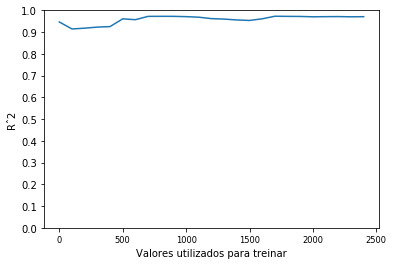

In [10]:
import matplotlib.pyplot as plt

# Grafico de Rˆ2 em relação a numero de valores usados para treinar
xticks = ['0', '500', '1000', '1500', '2000', '2500']

plt.plot(accuracy_list)
plt.xlabel('Valores utilizados para treinar')
plt.ylabel('Rˆ2')
plt.xticks(range(0, 26, 5), xticks, size='small')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

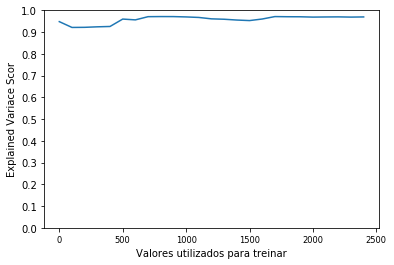

In [11]:
import matplotlib.pyplot as plt

# Grafico em relação a numero de valores usados para treinar
xticks = ['0', '500', '1000', '1500', '2000', '2500']

plt.plot(evs_list)
plt.xlabel('Valores utilizados para treinar')
plt.ylabel('Explained Variace Scor')
plt.xticks(range(0, 26, 5), xticks, size='small')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

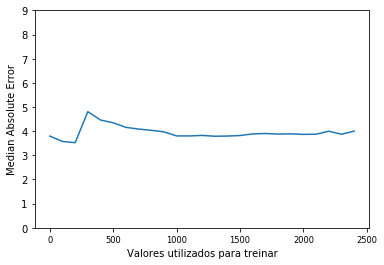

In [12]:
import matplotlib.pyplot as plt

# Grafico em relação a numero de valores usados para treinar
xticks = ['0', '500', '1000', '1500', '2000', '2500']

plt.plot(mae_list)
plt.xlabel('Valores utilizados para treinar')
plt.ylabel('Median Absolute Error')
plt.xticks(range(0, 26, 5), xticks, size='small')
plt.yticks(np.arange(0, 10, step=1))
plt.show()

In [13]:
#Métricas

print("Rˆ2 {}" .format(R_2))
print("Explained Variace Score: {}" .format(evs))
print("Median Absolute Error: {}" .format(mae))

Rˆ2 0.9709348313563861
Explained Variace Score: 0.9697645553845343
Median Absolute Error: 4.0012496782392475
